In [19]:
import sys
sys.path.append("..")

import Essentials


In [20]:
import numpy as np
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
import Essentials
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from abc import ABC, abstractmethod

In [21]:
# Загрузка данных
a = np.load('C:\\Users\\misha\\Soft-Sensors\\Makarov_Robast_regression\\Data_First.npz', allow_pickle=True)



In [22]:
def prepare_Y(y):
    timestamp = y[:, 1]   
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp
all_X_1 = a['all_X_1']
all_Y_1 = a['all_Y_1']

all_X_2 = a['all_X_2']
all_Y_2 = a['all_Y_2']

all_X_3 = a['all_X_3']
all_Y_3 = a['all_Y_3']
x_train, x_test, y_train, y_test = train_test_split(all_X_1, all_Y_1, test_size=0.3, random_state=42)
y_train, timestamp_train = prepare_Y(y_train)
y_test, timestamp_test = prepare_Y(y_test)


In [23]:
class RobustLinearSoftSensor(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train):
        super().__init__(name)  
        self.train(x_train, y_train)  

    def preprocessing(self, x):
        # Никакой предобработки данных не требуется
        return x

    def postprocessing(self, pred_values):
        # для визуализатора
        if pred_values.ndim == 1:
            pred_values = pred_values.reshape(-1, 1)
        return pred_values

    def evaluate_model(self, x):
        if self.get_model() is None:
            raise ValueError("Model is not trained yet.")
        return self.get_model().predict(x)

    def train(self, x_train, y_train):
        # Обучение модели HuberRegressor
        self.set_model(HuberRegressor())
        self.get_model().fit(x_train, y_train)
        # Оценка модели и сохранение коэффициента детерминации
        self.r2_score = self.get_model().score(x_train, y_train)
        self.coefficients = self.get_model().coef_

    def __str__(self):
        coefs_str = "\n".join([f"{coef:.4f}" for coef in self.coefficients])
        return (f"Robust Linear Soft Sensor '{self.get_name()}':\n"
                f"Coefficients:\n{coefs_str}\n"
                f"R2 score: {self.r2_score:.4f}")



In [24]:
sensor = RobustLinearSoftSensor(name='Robust Linear Sensor', x_train=x_train, y_train=y_train)

c:\Users\misha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\misha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [25]:
print(sensor)

Robust Linear Soft Sensor 'Robust Linear Sensor':
Coefficients:
0.0638
-0.1116
-0.0653
0.0457
0.0375
0.0007
-0.0074
0.0427
0.0103
0.0081
0.0427
0.0102
0.0891
0.0083
0.0064
0.0132
0.0935
0.0554
0.0092
-0.0138
-0.0033
0.0099
0.0895
0.0015
0.0031
0.0046
-0.1220
0.0338
-0.0574
-0.0134
0.0269
0.0797
0.0038
-0.0123
0.0291
0.0047
-0.1400
0.0048
0.0376
0.0013
-0.0747
-0.0233
0.0300
-0.0061
-0.0010
0.0083
-0.0282
-0.0036
0.0067
0.0000
-0.0148
0.0066
-0.0279
0.0066
-0.0236
0.0067
0.0209
0.0013
0.0064
0.0090
-0.0212
0.0009
-0.0024
0.0107
-0.0039
0.0052
-0.0361
0.0036
0.0136
0.0197
0.0053
0.0014
0.0352
0.0004
-0.0595
-0.0099
0.0360
-0.0075
-0.0031
-0.0012
0.0266
0.0058
0.0028
-0.0279
0.0065
-0.0515
0.0025
-0.0015
-0.0033
-0.0123
0.0197
0.0134
0.0059
0.0161
0.0059
R2 score: 0.7110


In [26]:
metric = Essentials.R2Metric()

In [27]:
test_visual_1 = Essentials.Visualizer(x_train, y_train, timestamp_train, [metric], 'Test SoftSensor R2 metric')

                      Coefficient of determination
Robust Linear Sensor                      0.711032


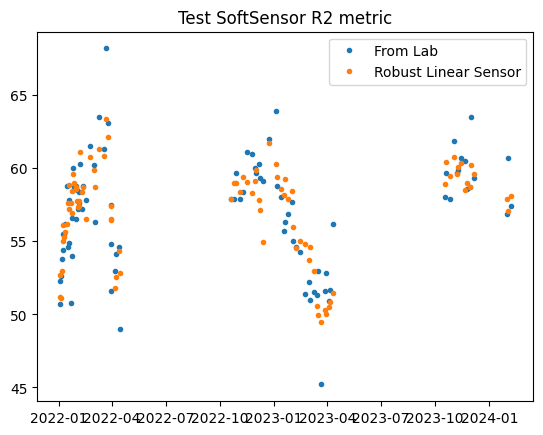

In [28]:

test_visual_1.visualize([sensor])

In [29]:
test_visual = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'Test SoftSensor R2 metric')

                      Coefficient of determination
Robust Linear Sensor                      0.645258


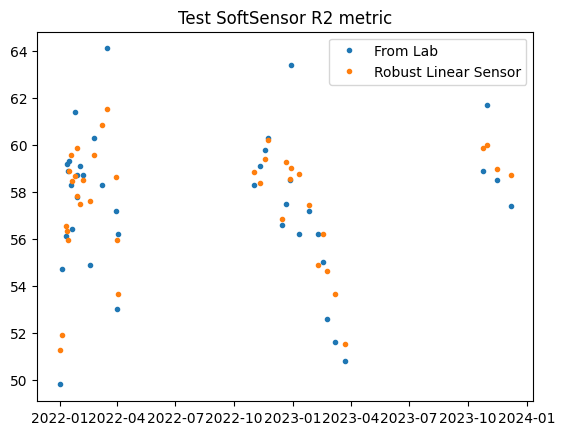

In [30]:
test_visual.visualize([sensor])